In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 정규화
from sklearn import preprocessing   # 전처리

In [2]:


data = pd.read_csv('BostonHousing.csv')
data = np.float32(data)


# 변수명
# 1인당 범죄율
# 초과 거주지역의 비율
# 점유하는 토지의 비율
# 더미변수(강의 경계에 위치한 경우 1)
# 일산화질소
# 평균 방의 개수
# 1940년 이전 소유주택의 비율
# 보스턴 직업센터까지 접근성 지수
# 방사형 도로까지 접근성 지수
# 재산세율
# 학생/교사 비율
# 자시치별 흑인의 비율
# 하위계층의 비율
# 본인 소유의 주택가격

In [3]:
xdata = data[:,:-1]
ydata = data[:,[-1]]

In [4]:
scale = preprocessing.MinMaxScaler()
dataN = scale.fit_transform( data )

In [5]:
dataN

array([[0.0000000e+00, 1.7999999e-01, 6.7815244e-02, ..., 1.0000000e+00,
        8.9679912e-02, 4.2222226e-01],
       [2.3592253e-04, 0.0000000e+00, 2.4230205e-01, ..., 1.0000000e+00,
        2.0447019e-01, 3.6888891e-01],
       [2.3569773e-04, 0.0000000e+00, 2.4230205e-01, ..., 9.8973721e-01,
        6.3465789e-02, 6.6000003e-01],
       ...,
       [6.1189244e-04, 0.0000000e+00, 4.2045456e-01, ..., 1.0000000e+00,
        1.0789183e-01, 4.2000002e-01],
       [1.1607299e-03, 0.0000000e+00, 4.2045456e-01, ..., 9.9130064e-01,
        1.3107064e-01, 3.7777779e-01],
       [4.6184164e-04, 0.0000000e+00, 4.2045456e-01, ..., 1.0000000e+00,
        1.6970198e-01, 1.5333334e-01]], dtype=float32)

In [6]:
xdata = dataN[:,:-1]
ydata = dataN[:,[-1]]


x = tf.placeholder( tf.float32 , shape =[None,13]) 
y = tf.constant( ydata, tf.float32)

w = tf.Variable( tf.random_uniform([13,1]))
b = tf.Variable( tf.random_uniform([1]))

hx = tf.matmul( x,w ) + b    
cost = tf.reduce_mean(tf.square(hx-y))

In [7]:
optimizer = tf.train.AdamOptimizer( 0.001 ) 

train = optimizer.minimize( cost )

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(10000) :
    # x가 placeholder이므로 feed_dict 줘야 함
    sess.run( train, {x:xdata} )
    print(i, sess.run(cost, {x:xdata}))

0 6.2539206
1 6.223354
2 6.192867
3 6.162459
4 6.132132
5 6.1018887
6 6.071728
7 6.041653
8 6.0116644
9 5.9817634
10 5.9519506
11 5.922227
12 5.8925943
13 5.8630533
14 5.8336053
15 5.8042502
16 5.77499
17 5.745825
18 5.716756
19 5.687783
20 5.6589074
21 5.630131
22 5.6014524
23 5.572874
24 5.544395
25 5.516016
26 5.4877386
27 5.459562
28 5.431487
29 5.403515
30 5.375644
31 5.3478765
32 5.320212
33 5.29265
34 5.265192
35 5.237837
36 5.210586
37 5.183439
38 5.156396
39 5.1294565
40 5.1026206
41 5.0758896
42 5.049262
43 5.0227385
44 4.996319
45 4.9700036
46 4.943793
47 4.917684
48 4.8916802
49 4.8657804
50 4.839983
51 4.8142896
52 4.7887
53 4.7632127
54 4.7378287
55 4.7125483
56 4.687369
57 4.662292
58 4.6373186
59 4.6124463
60 4.5876765
61 4.5630083
62 4.5384426
63 4.5139766
64 4.489613
65 4.465349
66 4.441187
67 4.4171243
68 4.3931623
69 4.369301
70 4.345538
71 4.3218756
72 4.2983127
73 4.274848
74 4.251482
75 4.228216
76 4.2050476
77 4.1819773
78 4.1590047
79 4.13613
80 4.113352
81 4.0

In [8]:
sess.run(w)

array([[-0.20897083],
       [ 0.10199887],
       [ 0.01712685],
       [ 0.05963826],
       [-0.1810895 ],
       [ 0.4735296 ],
       [ 0.00326903],
       [-0.34065834],
       [ 0.15236677],
       [-0.14193435],
       [-0.19142467],
       [ 0.09171543],
       [-0.40850565]], dtype=float32)

In [9]:
sess.run(b)

array([0.43512586], dtype=float32)

In [10]:
arr = scale.transform([[0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98, 24.0]])

# 슬라이싱
arr[:, :-1]

array([[-1.11293048e-12,  1.79999996e-01,  6.78152471e-02,
         0.00000000e+00,  3.14814851e-01,  5.77505240e-01,
         6.41606576e-01,  2.69203131e-01,  0.00000000e+00,
         2.08015264e-01,  2.87233998e-01,  1.00000001e+00,
         8.96799073e-02]])

In [11]:
data[:,[-1]]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [12]:
labelScale = preprocessing.MinMaxScaler()
y1 = labelScale.fit_transform(data[:,[-1]] )
y1

array([[0.42222226],
       [0.3688889 ],
       [0.66      ],
       [0.63111115],
       [0.6933334 ],
       [0.5266667 ],
       [0.3977778 ],
       [0.49111116],
       [0.25555557],
       [0.30888888],
       [0.22222224],
       [0.30888888],
       [0.37111115],
       [0.34222224],
       [0.29333338],
       [0.33111113],
       [0.40222228],
       [0.2777778 ],
       [0.33777782],
       [0.29333338],
       [0.19111115],
       [0.32444447],
       [0.22666669],
       [0.21111113],
       [0.23555559],
       [0.19777778],
       [0.2577778 ],
       [0.21777779],
       [0.29777777],
       [0.35555556],
       [0.1711111 ],
       [0.21111113],
       [0.18222222],
       [0.18000004],
       [0.1888889 ],
       [0.30888888],
       [0.33333334],
       [0.35555556],
       [0.43777782],
       [0.5733333 ],
       [0.6644445 ],
       [0.48000002],
       [0.45111114],
       [0.43777782],
       [0.36000004],
       [0.31777778],
       [0.33333334],
       [0.257

In [13]:
b1 = sess.run(hx,{x:arr[:,:13]})

In [14]:
b1

array([[0.5520669]], dtype=float32)

In [15]:
labelScale.inverse_transform(b1)

array([[29.84301]], dtype=float32)

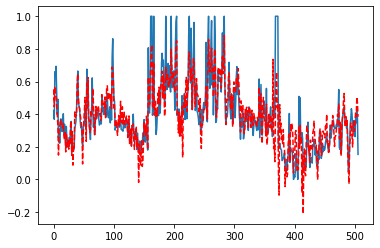

In [16]:
plt.plot(ydata)
plt.plot(sess.run(hx, {x:xdata}), 'r--')
plt.show()